In [1]:
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

churn_data = pd.read_csv('data/churn.csv')
churn_data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# Задания


# 9.1 
Каково соотношение ушедших и лояльных клиентов? Покажите это на графике и дайте комментарий по соотношению.


In [2]:

# так как необходимо показать соотношение, значит нам нужна пропорция. Пропорция будет наглядна видна в круговой диагремме
# нам нужен столбец Exited, показывающий статус лояльности
churn_condition=churn_data['Exited'].value_counts() # фцнкция, показывающая ситуацию с клиентами
display(churn_condition)

Exited
0    7963
1    2037
Name: count, dtype: int64

Text(1, 1, '0-лояльные; 1-ушедшие')

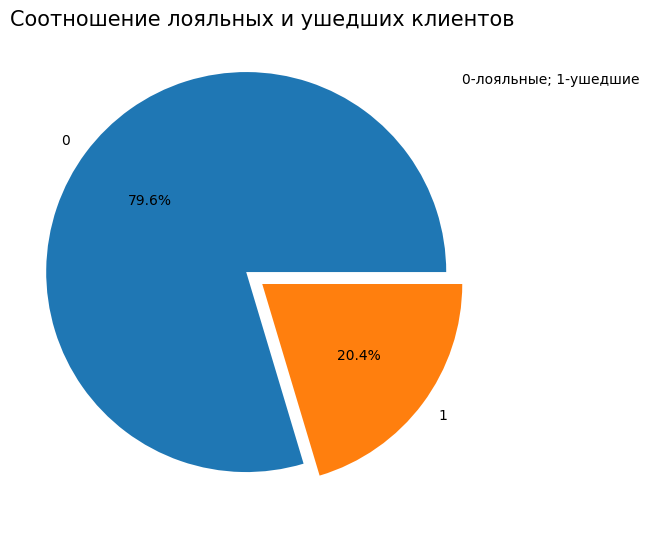

In [3]:
# Постороим круговую диаграмму
fig= plt.figure(figsize=(5,5))
axes = fig.add_axes([0,0,1,1])
axes.pie(
    churn_condition,
    labels = churn_condition.index,
    autopct='%.1f%%',
    explode= [0.1,0]
);
plt.title('Соотношение лояльных и ушедших клиентов', fontsize=15)
plt.text(1, 1, '0-лояльные; 1-ушедшие')

### Вывод: 
На круговаой диаграмме наглядно показано соотношение лояльных и ушедших клиентов, из которых 79,6% - клиенты, продолжающие пользоваться услугами банка, а 20,4% - клиенты, покинувшие банк.


# 9.2. 
Постройте график, показывающий распределение баланса пользователей, у которых на счету больше 2 500 долларов. Опишите распределение и сделайте выводы.


In [4]:
import seaborn as sns
import pandas as pd
import plotly 
import plotly.express as px

In [6]:
churn_balance=churn_data['Balance']>2500 # записываем в переменную отфильтрованные данные

fig = px.histogram(
    churn_data[churn_balance],
    x='Balance',
    labels={'Balance':'Баланс на счету клиента, $', 'y':'Количество клиентов, чел.'},
    marginal='box',
    nbins=40,
    title=("Распределение баланса клиентов более с чем 2500k долларов"),
    
)

fig.show()

### Выводы:
1. Гистограмма наглядно показывает распрелделение баланса: у свыше 800 человек баланс находится в пределе 120-130k 
2. По коробчатой диаграмме можем сделать следующие выводы:
3. Ширина межквартильного размаха находится в пределах от 100k до 139k.
4. Потенциальные выбросы наблюдаются до 41k  и свыше 198k, в этих же точках находятся границы распределения, медиананное значение составляет 119k, минимальный аномальный баланс=3k,а максимальный=250k

# 9.3
Посмотрите на распределение баланса клиента в разрезе признака оттока. Как различаются суммы на накопительном счёте ушедших и лояльных клиентов? Подумайте и напишите, с чем это может быть связано, что может не устраивать ушедших клиентов в банке.



In [15]:
fig1=plt.figure(figsize=(15,6))


boxplot=px.box(
    data_frame=churn_data, 
    x='Balance',
    y='Exited', 
    labels={'Balance':'Баланс клиента', 'Exited':'Отток клиентов'},
    height= 500,
    width= 1000,
    orientation= 'h',
    color= 'Exited',
    title=('Распределение баланса в рзарезе оттока клиентов'),
    
    )


boxplot.show()


<Figure size 1500x600 with 0 Axes>

### Выводы:
1. На коробчатой диаграмме видно, что у ушедих клиентов распределение начинается с 0 и диапазон значений шире, чем у лояльных, но у лояльных диапазон находится правее на графике, это говорит о том, что состояние лояльных клиентов выше.
2. По медианам видно, у лояльных клиентов медианное значение баланса больше, чем у ушедших
3. Разброс данных у лояльных клиентов больше, это нам показывают "усики", диаграммы


# 9.4 
Посмотрите на распределение возраста в разрезе признака оттока. В какой группе больше потенциальных выбросов? На какую возрастную категорию клиентов стоит обратить внимание банку?



In [16]:
fig1=plt.figure(figsize=(30,15))
boxplot=px.box(
    data_frame=churn_data, 
    x='Age',
    y='Exited', 
    labels={'Age':'Возраст клиента', 'Exited':'Отток клиентов'},
    height= 500,
    width= 1000,
    orientation= 'h',
    color= 'Exited',
    title=('Распределение возраста в рзарезе оттока клиентов'),
    
    )

boxplot.show()

<Figure size 3000x1500 with 0 Axes>

### Выводы:
1. Потенциальных выбросов больше у ушедших клиентов
2. Подавляющее большинство лояльных клиентов находтся в возрастой группе от 38 до 51 года, у ушедших клиентов диапазон лежит в пределах от 31 до 41 года



# 9.5 
Постройте график, который показывает взаимосвязь кредитного рейтинга клиента и его предполагаемой зарплаты. Добавьте расцветку по признаку оттока клиентов. Какова взаимосвязь между признаками? Если не видите явной взаимосвязи, укажите это.


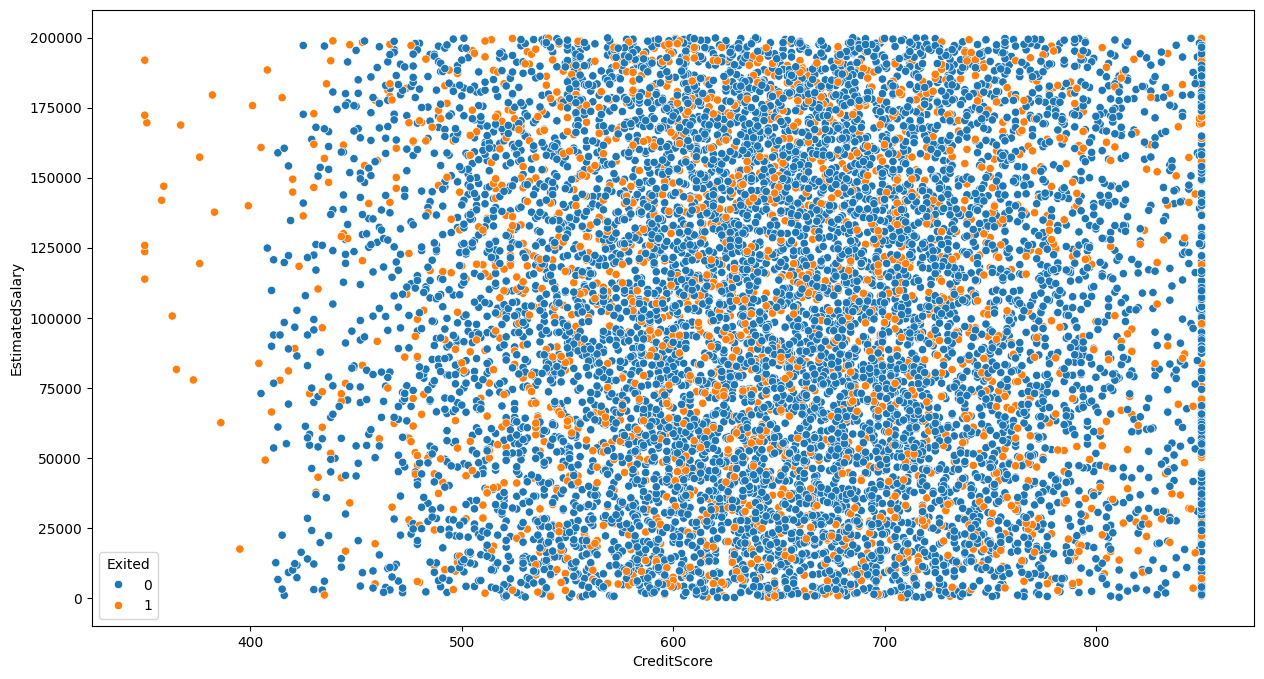

In [17]:
fig2=plt.figure(figsize=(15,8))
scatterplot=sns.scatterplot(
    data=churn_data,
    x='CreditScore',
    y='EstimatedSalary',
    hue='Exited',
)

### Выводы:
1. Зависимости кредитного рейтига от зароботной платы не наблюдается. 
2. Кредитный рейтинг меньше 400 у ушедших клиентов, у которых доход от среднего до высокого.



# 9.6
Кто чаще уходит, мужчины или женщины? Постройте график, который иллюстрирует это. Процент ушедших клиентов в каждой группе можно рассчитать как среднее по столбцу Exited (так как 1 — это ушедшие клиенты, а 0 — лояльные, среднее арифметическое по столбцу обозначает долю ушедших клиентов).



In [18]:
grouped_by_gender = churn_data.groupby(['Gender'])['Exited'].mean()
fig = px.bar(
    data_frame=grouped_by_gender,
    x=grouped_by_gender.index,
    y='Exited',
    height=500, #высота
    width=700, #ширина
    title='Доли ушедших клиентов в разрезе пола'
)
fig.show()

### Вывод:
Доля женщин, ушедших из банка юольше

# 9.7
 Как отток клиентов зависит от числа приобретённых у банка услуг? Для ответа на этот вопрос постройте многоуровневую столбчатую диаграмму.


C:\Users\smirn\AppData\Local\Temp\ipykernel_40452\1769200304.py:19: UserWarning:

FigureCanvasAgg is non-interactive, and thus cannot be shown



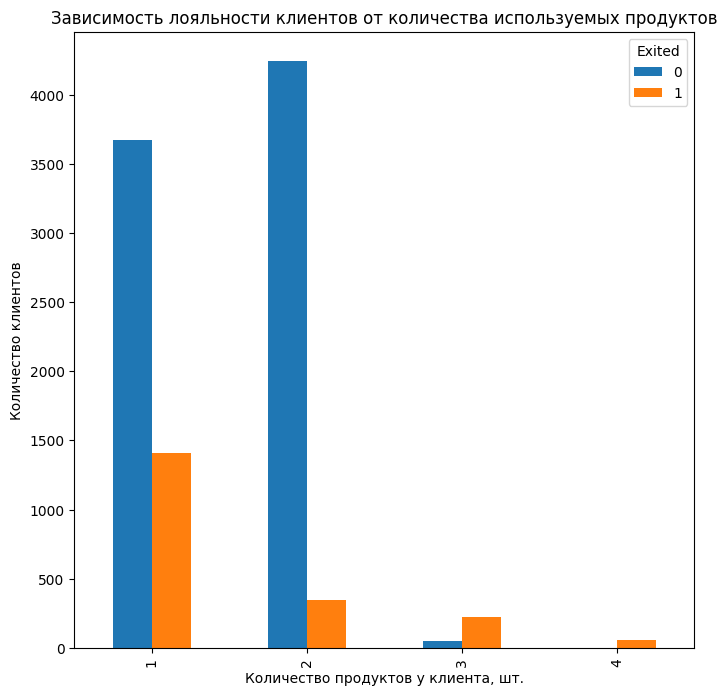

In [19]:
pivot_1 = churn_data.pivot_table(
    'CustomerId',
    index='NumOfProducts',
    columns='Exited',
    aggfunc='count'
)
pivot_1 = pivot_1.fillna(0)

fig_3, axes_7 = plt.subplots(figsize=(8, 8))
pivot_1.plot(
    kind='bar',
    ax=axes_7
    
)
axes_7.set_title('Зависимость лояльности клиентов от количества используемых продуктов')
axes_7.set_xlabel('Количество продуктов у клиента, шт.')
axes_7.set_ylabel('Количество клиентов')

fig_3.show()

### Вывод: 
Отток уменьшается, если клиенты приобретают больше услуг банка

# 9.8 
Как влияет наличие статуса активного клиента на отток клиентов? Постройте диаграмму, иллюстрирующую это. Что бы вы предложили банку, чтобы уменьшить отток клиентов среди неактивных?


C:\Users\smirn\AppData\Local\Temp\ipykernel_40452\2569381789.py:19: UserWarning:

FigureCanvasAgg is non-interactive, and thus cannot be shown



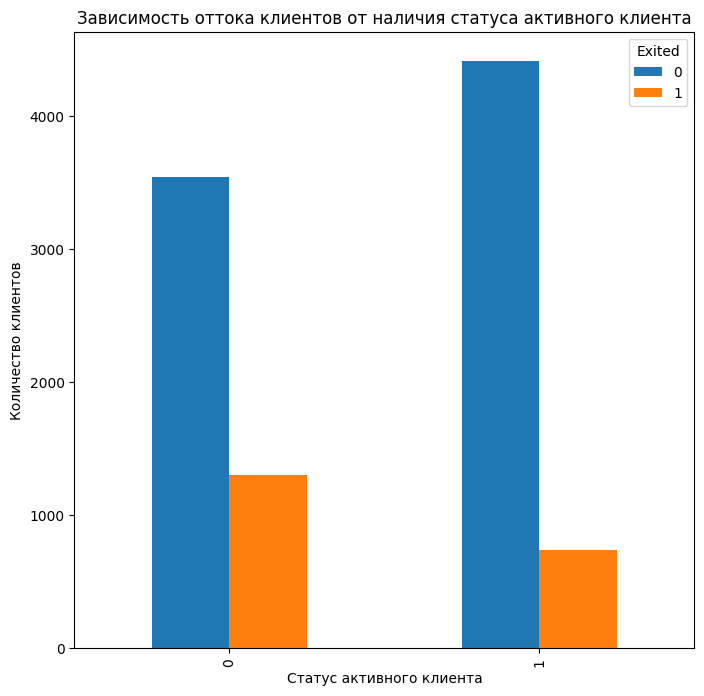

In [20]:
pivot_2 = churn_data.pivot_table(
    'CustomerId',
    index='IsActiveMember',
    columns='Exited',
    aggfunc='count'
)
pivot_2 = pivot_2.fillna(0)

fig_4, axes_8 = plt.subplots(figsize=(8, 8))
pivot_2.plot(
    kind='bar',
    ax=axes_8
    
)
axes_8.set_title('Зависимость оттока клиентов от наличия статуса активного клиента')
axes_8.set_xlabel('Cтатус активного клиента')
axes_8.set_ylabel('Количество клиентов')

fig_4.show()

### Выводы:
1. Если есть статус активного клиента, то количество лояльных клиентов ппревышает в разы количество ушедших, т.е. без статуса активности отток клиентов больше.
2. Чтобы уменьшить отток клиентов банку нужно предложить неактивным пользователям выгодные условия: программы лояльности, бонусы, специальные предложения и т.д
 


# 9.9
В какой стране доля ушедших клиентов больше? Постройте тепловую картограмму, которая покажет это соотношение на карте мира. Предположите, с чем это может быть связано.


In [21]:
pivot_3 = churn_data.pivot_table(
    values='Exited',
    index='Geography',
    aggfunc= 'mean',
)
fig_5 = px.choropleth(
    data_frame=pivot_3, 
    locations=pivot_3.index, 
    locationmode = "country names", 
    color= 'Exited', 
    range_color=[0, 0.35], 
    title='Доля ушедших клиентов по странам', 
    
    width=800,
    height=500,
    color_continuous_scale='Blues'
)
fig_5.show()

### Вывод:
Доля ушедших клиентов (0.32) больше в Германии, точной причины этому мы предположить из наших данных не можем, возможно банк для жителей Германии банк иностранный, а они больше доверяют отечественным баннкам


# 9.10 
Переведите числовой признак CreditScore в категориальный. Для этого воспользуйтесь функцией get_credit_score_cat(), которая приведена ниже. Примените её к столбцу CreditScore и создайте новый признак CreditScoreCat — категории кредитного рейтинга.
Постройте сводную таблицу, строками которой являются категории кредитного рейтинга (CreditScoreCat), а столбцами — количество лет, в течение которых клиент пользуется услугами банка (Tenure). В ячейках сводной таблицы должно находиться среднее по признаку оттока (Exited) — доля ушедших пользователей.

На основе полученной сводной таблицы постройте тепловую карту с аннотацией. Найдите на тепловой карте категории клиентов, которые уходят чаще всего.


In [22]:
def get_credit_score_cat(credit_score):
    if credit_score >= 300 and credit_score < 500:
        return "Very_Poor"
    elif credit_score >= 500 and credit_score < 601:
        return "Poor"
    elif credit_score >= 601 and credit_score < 661:
        return "Fair"
    elif credit_score >= 661 and credit_score < 781:
        return "Good"
    elif credit_score >= 781 and credit_score < 851:
        return "Excellent"
    elif credit_score >= 851:
        return "Top"
    elif credit_score < 300:
        return "Deep"
    
churn_data['CreditScoreCat'] = churn_data['CreditScore'].apply(get_credit_score_cat)

pivot_10 = round(pd.pivot_table(
    churn_data,
    index = 'CreditScoreCat',
    columns = 'Tenure',
    values = 'Exited',
    aggfunc = 'mean' 
), 2);
display(pivot_10)
fig = px.imshow(pivot_10, text_auto = True, title = 'Тепловая карта распределения среднего значения оттока клиентов')
fig.show()

Tenure,0,1,2,3,4,5,6,7,8,9,10
CreditScoreCat,,,,,,,,,,,
Excellent,0.28,0.21,0.14,0.17,0.13,0.23,0.24,0.13,0.20,0.27,0.25
Fair,0.22,0.22,0.21,0.22,0.20,0.21,0.24,0.17,0.21,0.19,0.21
Good,0.20,0.20,0.19,0.21,0.20,0.21,0.18,0.19,0.15,0.19,0.20
Poor,0.23,0.26,0.21,0.21,0.23,0.20,0.18,0.15,0.21,0.25,0.17
Very_Poor,0.44,0.25,0.15,0.29,0.29,0.15,0.23,0.21,0.25,0.23,0.33


### Вывод:
По тепловой карте мы видим, что чаще уходят клиенты категории Very_Poor особенно в начале своего пользовательского пути( до 1 года)
